# Predicting House Sale Prices

## Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Step 2: Load the Data

In [7]:
houses = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')

In [8]:
# To get the first 5 elemnts of the training dataset
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# To get the first 5 elemnts of the testing dataset
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# To get the columns of the training dataset
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# To get the shape of the training dataset
houses.shape

(1460, 81)

In [14]:
# To get the columns of the testing dataset
houses_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# To get the shape of the testing dataset
houses_test.shape

(1459, 80)

In [16]:
# To get the info of the training dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# To get the info of the testing dataset
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [21]:
# To get the descriptive statistic of the training dataset
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [22]:
# To get the descriptive statistic of the testing dataset
houses_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


## Step 3: Check for Missing Values

In [24]:
# Sum of null values in each column of the training dataset
null_values_train = houses.isnull().sum()
print(null_values_train[null_values_train > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [28]:
# Sum of null values in each column of the training dataset
null_values_test = houses_test.isnull().sum()
null_values_test[null_values_test > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Step 4: Data Cleaning

In [34]:
# Handle Missing Values

# Identify categorical and numerical columns (excluding 'SalePrice' from numerical columns)
cat_cols = houses.select_dtypes(include=['object']).columns.tolist()
num_cols = houses.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice']).columns.tolist()

# Replace missing values in categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
houses[cat_cols] = cat_imputer.fit_transform(houses[cat_cols])
houses_test[cat_cols] = cat_imputer.transform(houses_test[cat_cols])

# Replace missing values in numerical columns with median
num_imputer = SimpleImputer(strategy='median')
houses[num_cols] = num_imputer.fit_transform(houses[num_cols])
houses_test[num_cols] = num_imputer.transform(houses_test[num_cols])


In [35]:
# Verify if all missing values have been handled
print("Missing values in training set after handling:")
print(houses.isnull().sum().sum())  # Should output 0

print("\nMissing values in test set after handling:")
print(houses_test.isnull().sum().sum())  # Should output 0

Missing values in training set after handling:
0

Missing values in test set after handling:
0


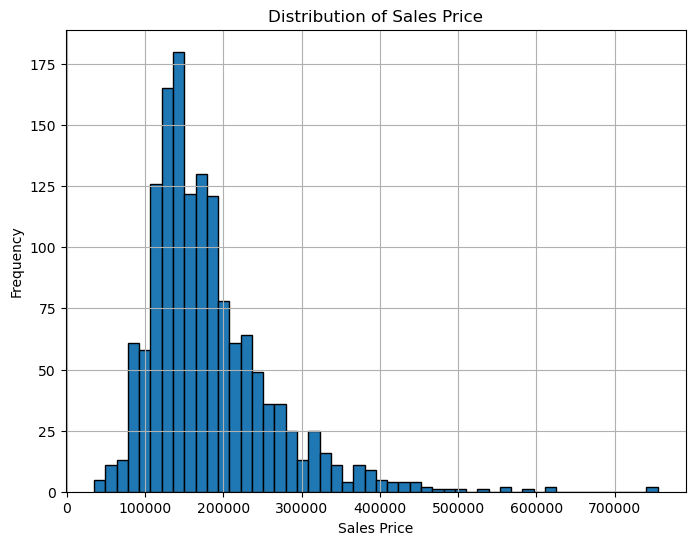

In [37]:
# Ploting Sales Price
plt.figure(figsize=(8, 6))
plt.hist(houses['SalePrice'], bins=50, edgecolor='black')
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
# Plot interactive histogram
fig = px.histogram(houses, x='SalePrice', nbins=50, title='Distribution of Sales Price')
fig.show()

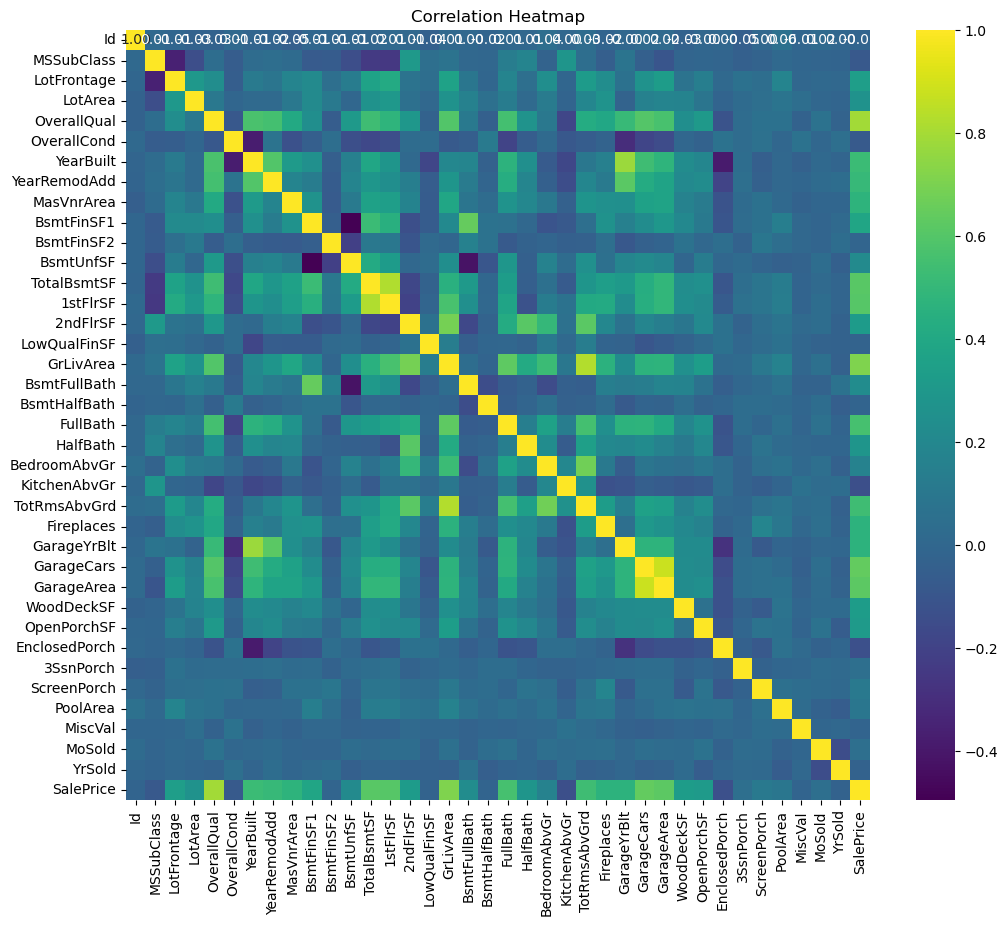

In [48]:
# Compute correlation matrix

# Filter only numeric columns
numeric_columns = houses.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = houses[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [57]:
# Sort top 5 features based on SalePrice
top_5_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_5_correlation.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


### Interpretation:
- The subsequent rows show the top features that correlate strongly with `SalePrice`:
  - `OverallQual` (Overall Quality) has a correlation coefficient of approximately 0.79, indicating a strong positive correlation. As `OverallQual` increases, `SalePrice` tends to increase as well.
  - Other features like `GrLivArea` (Above Ground Living Area), `GarageCars` (Size of Garage in Car Capacity), `GarageArea` (Size of Garage in Square Feet), `TotalBsmtSF` (Total Square Feet of Basement Area), and so on, also show strong positive correlations with `SalePrice`.

These correlations provide insight into which features are most influential in determining the `SalePrice` of houses in your dataset. This information can guide further analysis or modeling efforts, such as selecting important features for predicting `SalePrice`. If you have any more questions or need further clarification, feel free to ask!

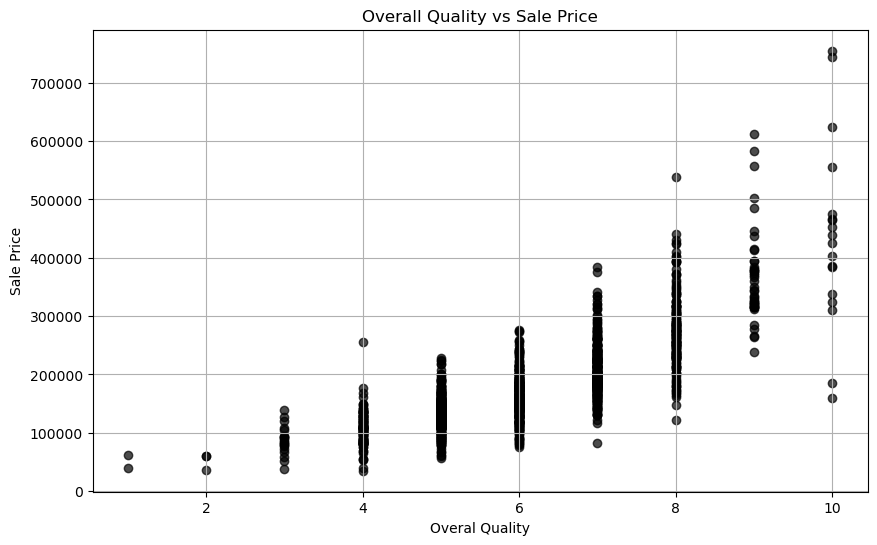

In [59]:
# Scatter plot of OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['OverallQual'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overal Quality')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

The visual representation shows that an increase in the overall quality is directly related to increase in the sale price

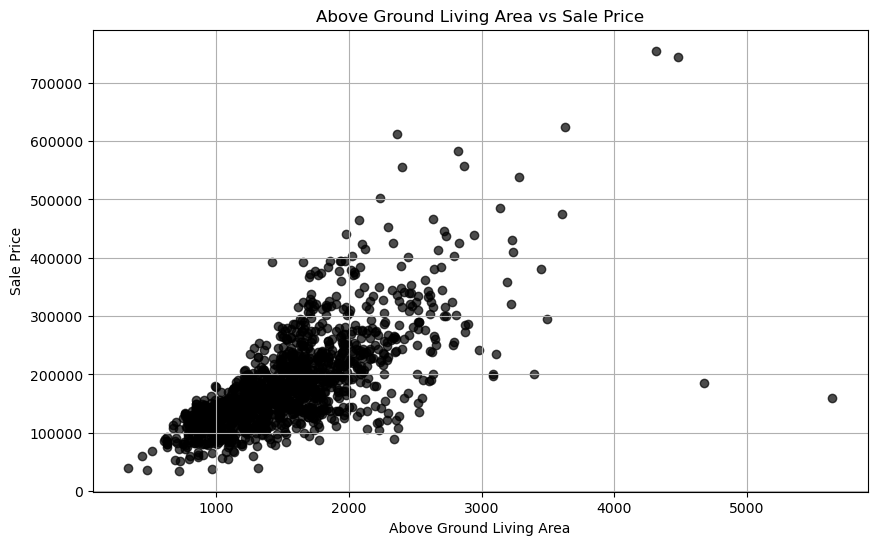

In [60]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GrLivArea'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

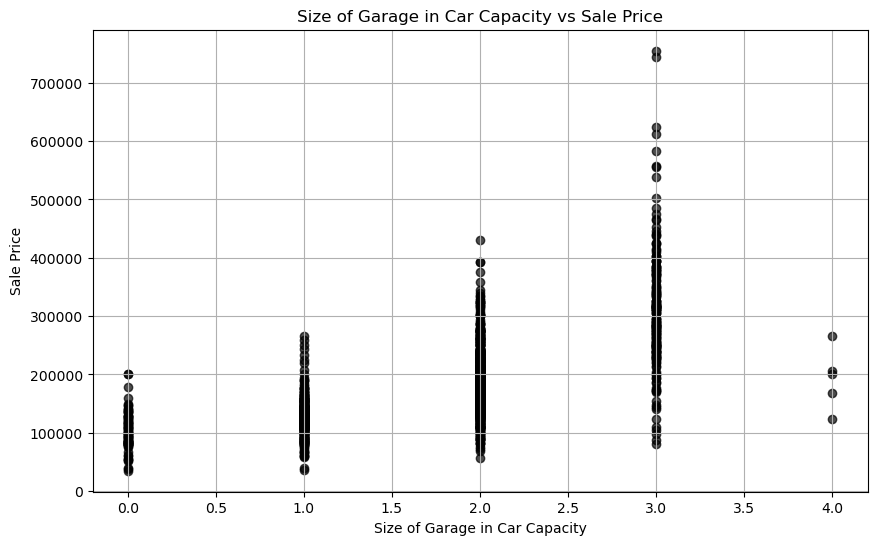

In [61]:
# Scatter plot of GarageCars vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GarageCars'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Size of Garage in Car Capacity vs Sale Price')
plt.xlabel('Size of Garage in Car Capacity')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

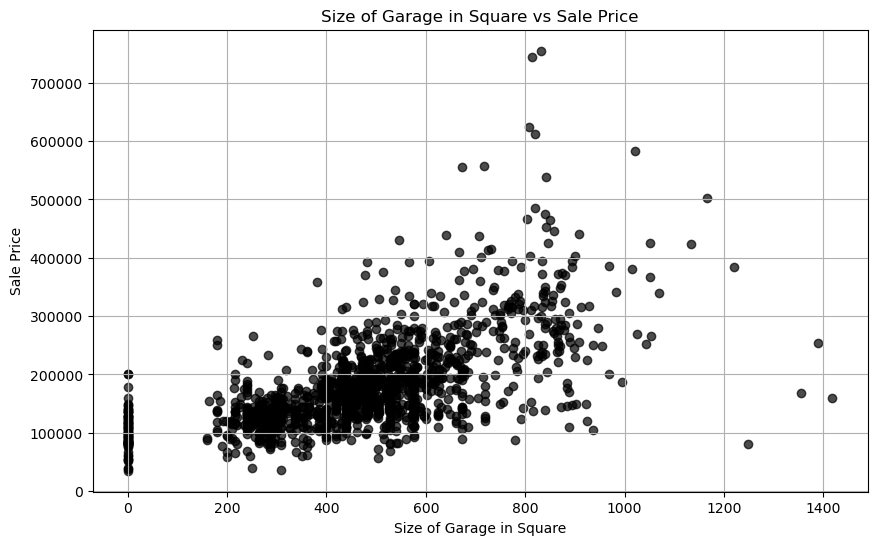

In [63]:
# Scatter plot of GarageArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GarageArea'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Size of Garage in Square vs Sale Price')
plt.xlabel('Size of Garage in Square')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [65]:
fig = px.scatter_matrix(houses, 
                        dimensions=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'],
                        title='Pair Plot of Selected Features')
fig.update_layout(width=1000, height=1000)
fig.show()

c:\Users\kevin\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



## Step 6: Model Building

In [76]:
# Split the training data for validation
features = ['OverallQual', 'GrLivArea', 'GarageCars',
            'TotalBsmtSF','GarageArea', '1stFlrSF',
            'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = houses[features]
y = houses['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Starndardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [78]:
# Train The Linear Regression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))

print("Linear Regression RMSE:", lr_rmse)

# Additional evaluation metrics
mse = mean_squared_error(y_val, lr_predictions)
mae = mean_absolute_error(y_val, lr_predictions)
r2 = r2_score(y_val, lr_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Linear Regression RMSE: 39568.64464628706
Mean Squared Error (MSE): 1565677639.1441417
Root Mean Squared Error (RMSE): 39568.64464628706
Mean Absolute Error (MAE): 24935.83323394043
R-squared (R2): 0.79587861104563


In [79]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))

print(f'Random Forest RMSE: {rf_rmse}')

# Additional evaluation metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_val, rf_predictions)
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_r2 = r2_score(y_val, rf_predictions)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest R-squared (R2): {rf_r2}")

Random Forest RMSE: 29534.804876670853
Random Forest Mean Squared Error (MSE): 872304699.1030204
Random Forest Mean Absolute Error (MAE): 19025.962361790607
Random Forest R-squared (R2): 0.8862754105183078


## Step 7: Prediction of SalePrice

In [80]:
# Predicting SalePrice for test data
X_test = houses_test[features]

# Predictions using Linear Regression
lr_test_predictions = lr.predict(X_test)

# Predictions using Random Forest
rf_test_predictions = rf.predict(X_test)


c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [83]:
# Create DataFrame for submission using Linear Regression
submission = pd.DataFrame({
    'Id': houses_test['Id'],
    'SalePrice': lr_test_predictions
})

submission.head()


,Id,SalePrice
0,1461.0,5.735940e+07
1,1462.0,7.235073e+07
2,1463.0,7.609130e+07
3,1464.0,7.544091e+07
4,1465.0,7.151838e+07


In [85]:
# Save the submission file
submission.to_csv('linear_submission.csv', index=False)

In [86]:
# Create DataFrame for submission using Random Forest
submission = pd.DataFrame({
    'Id': houses_test['Id'],
    'SalePrice': rf_test_predictions
})

submission.head()

,Id,SalePrice
0,1461.0,321036.47
1,1462.0,321036.47
2,1463.0,340192.32
3,1464.0,340192.32
4,1465.0,340192.32


In [87]:
# Save the submission file
submission.to_csv('random_submission.csv', index=False)